### Importing the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Counting the number of male female customers

In [13]:
male= data[data.gender=='Male'].count()[0]
female= data[data.gender=='Female'].count()[0]
print(male)
print(female)

3555
3488


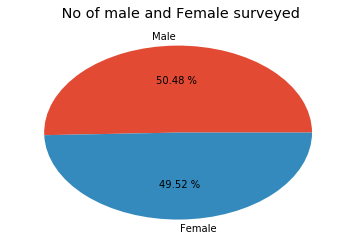

In [23]:
labels=['Male','Female']
plt.style.use('ggplot')
plt.pie([male,female], labels= labels, autopct='%.2f %%')
plt.title(" No of male and Female surveyed")
plt.show()

### Counting the tenure of customers 

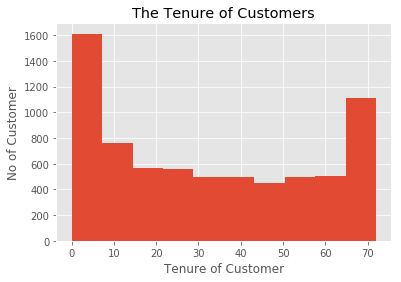

In [24]:
plt.hist(data.tenure)
plt.style.use('ggplot')
plt.title("The Tenure of Customers")
plt.xlabel("Tenure of Customer")
plt.ylabel("No of Customer")
plt.show()

### Average montly charge for churned and not churned customer 

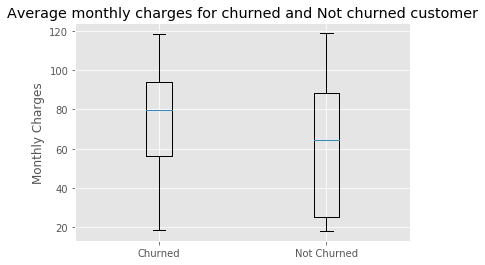

In [31]:
churn= data[data.Churn=='Yes']
not_churn= data[data.Churn=='No']

labels=['Churned', 'Not Churned']
plt.boxplot([churn.MonthlyCharges, not_churn.MonthlyCharges], labels=labels)
plt.ylabel('Monthly Charges')
plt.title('Average monthly charges for churned and Not churned customer')
plt.show()

### Distribution of Contracts

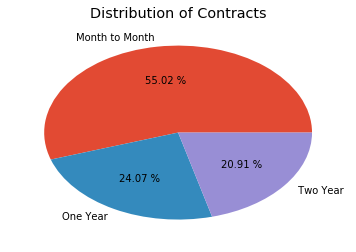

In [50]:
data.Contract.value_counts().tolist()
labels=['Month to Month','One Year',' Two Year']
plt.pie(data.Contract.value_counts().tolist(), autopct='%.2f %%', labels=labels)
plt.title('Distribution of Contracts')
plt.show()


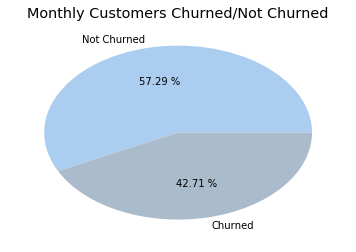

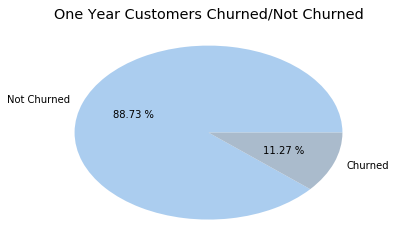

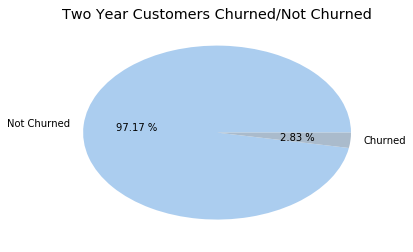

In [59]:
monthtomonth= data[data.Contract=='Month-to-month']

oneyear=data[data.Contract=='One year']

twoyear=data[data.Contract=='Two year']

colors = ['#abcdef', '#aabbcc']
labels=['Not Churned','Churned']
plt.pie(monthtomonth.Churn.value_counts().tolist(), autopct='%.2f %%', labels=labels, colors=colors)
plt.title('Monthly Customers Churned/Not Churned')
plt.show()

labels=['Not Churned','Churned']
plt.pie(oneyear.Churn.value_counts().tolist(), autopct='%.2f %%', labels=labels,colors=colors)
plt.title('One Year Customers Churned/Not Churned')
plt.show()

labels=['Not Churned','Churned']
plt.pie(twoyear.Churn.value_counts().tolist(), autopct='%.2f %%', labels=labels,colors=colors)
plt.title('Two Year Customers Churned/Not Churned')
plt.show()



### Converting categorical values to find correlations

In [7]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [16]:
data['Churn_1/0']= data.Churn.map({'Yes':1, 'No':0})
data['PaperlessBilling_1/0']= data.PaperlessBilling.map({'Yes':1, 'No':0})
data['PhoneService_1/0']= data.PhoneService.map({'Yes':1, 'No':0})
data['Dependents_1/0']= data.Dependents.map({'Yes':1, 'No':0})
data['Partner_1/0']= data.Partner.map({'Yes':1, 'No':0})
data['gender_1/0']= data.gender.map({'Male':1, 'Female':0})
data.head()
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,Churn_1/0,PaperlessBilling_1/0,PhoneService_1/0,Dependents_1/0,Partner_1/0,gender_1/0
SeniorCitizen,1.000000,0.016567,0.220173,0.150889,0.156530,0.008576,-0.211185,0.016479,-0.001874
tenure,0.016567,1.000000,0.247900,-0.352229,0.006152,0.008448,0.159712,0.379697,0.005106
MonthlyCharges,0.220173,0.247900,1.000000,0.193356,0.352150,0.247398,-0.113890,0.096848,-0.014569
Churn_1/0,0.150889,-0.352229,0.193356,1.000000,0.191825,0.011942,-0.164221,-0.150448,-0.008612
PaperlessBilling_1/0,0.156530,0.006152,0.352150,0.191825,1.000000,0.016505,-0.111377,-0.014877,-0.011754
PhoneService_1/0,0.008576,0.008448,0.247398,0.011942,0.016505,1.000000,-0.001762,0.017706,-0.006488
Dependents_1/0,-0.211185,0.159712,-0.113890,-0.164221,-0.111377,-0.001762,1.000000,0.452676,0.010517
Partner_1/0,0.016479,0.379697,0.096848,-0.150448,-0.014877,0.017706,0.452676,1.000000,-0.001808
gender_1/0,-0.001874,0.005106,-0.014569,-0.008612,-0.011754,-0.006488,0.010517,-0.001808,1.000000


### Displaying the relationship between categorical variables and the churn

In [11]:

display(pd.crosstab(data["PhoneService"], data["Churn"], margins = True, normalize='index'))
display(pd.crosstab(data["Dependents"], data["Churn"], margins = True, normalize='index'))
display(pd.crosstab(data["Partner"], data["Churn"], margins = True, normalize='index'))
display(pd.crosstab(data["gender"], data["Churn"], margins = True, normalize='index'))
for i in data.columns[7:18]:
    display(pd.crosstab(data[i], data["Churn"], margins = True, normalize='index'))


Churn,No,Yes
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096
All,0.734630,0.265370


Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502
All,0.734630,0.265370


Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649
All,0.734630,0.265370


Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603
All,0.734630,0.265370


Churn,No,Yes
MultipleLines,,
No,0.749558,0.250442
No phone service,0.750733,0.249267
Yes,0.713901,0.286099
All,0.734630,0.265370


Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050
All,0.734630,0.265370


Churn,No,Yes
OnlineSecurity,,
No,0.582333,0.417667
No internet service,0.925950,0.074050
Yes,0.853888,0.146112
All,0.734630,0.265370


Churn,No,Yes
OnlineBackup,,
No,0.600712,0.399288
No internet service,0.925950,0.074050
Yes,0.784685,0.215315
All,0.734630,0.265370


Churn,No,Yes
DeviceProtection,,
No,0.608724,0.391276
No internet service,0.925950,0.074050
Yes,0.774979,0.225021
All,0.734630,0.265370


Churn,No,Yes
TechSupport,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663
All,0.734630,0.265370


Churn,No,Yes
StreamingTV,,
No,0.664769,0.335231
No internet service,0.925950,0.074050
Yes,0.699298,0.300702
All,0.734630,0.265370


Churn,No,Yes
StreamingMovies,,
No,0.663196,0.336804
No internet service,0.925950,0.074050
Yes,0.700586,0.299414
All,0.734630,0.265370


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319
All,0.734630,0.265370


Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651
All,0.734630,0.265370


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067
All,0.734630,0.265370


### Findings

I see there are a few things that I would like to investigate. I see few vartiable that have a significant impact on the churn of a customers.
1. Payment Method that the user selects has some impact on this decision to churn
2. If the user has a month to month contract the user is more likely to leave and go to a competitor
3. Fiber optics internet has a higher churn rate that a DSl line due to competition.
4. Customer who opt for  paperlessbilling have a higher chance of churning.
5. Customers who dont have a partner or dependents are more likely to churn that those who dont.
6. Customers who dont have tech support, online security , online backup  services are more likely to churn.
7. The monthly charge has an effect on the churn
8. The tenure of a customer have a significant negative correlation

Each of these finding plays a part on the decision of the customer.